In [1]:
%matplotlib inline
import sys,os
try:
    import matk
except:
    try:
        sys.path.append(os.path.join('..','src'))
        import matk
    except ImportError as err:
        print 'Unable to load MATK module: '+str(err)
import numpy
from scipy import arange, randn, exp
from multiprocessing import freeze_support

# Model function
def dbexpl(p):
    t=arange(0,100,20.)
    y =  (p['par1']*exp(-p['par2']*t) + p['par3']*exp(-p['par4']*t))
    #nm =  ['o1','o2','o3','o4','o5']
    #return dict(zip(nm,y))
    return y

# Setup MATK model with parameters
p = matk.matk(model=dbexpl)
p.add_par('par1',min=0,max=1)
p.add_par('par2',min=0,max=0.2)
p.add_par('par3',min=0,max=1)
p.add_par('par4',min=0,max=0.2)

print (p.parmaxs+p.parmins)/2 + numpy.array([0.1,0.01,0.15,0.05]) * numpy.random.randn(4)

[ 0.53739477  0.11414422  0.36677791  0.08696791]


[]


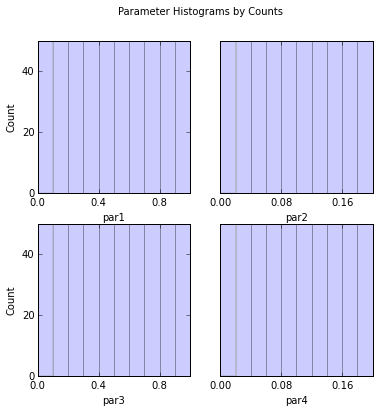



par1:
Count:           50       50       50       50       50       50       50       50       50       50 
 Bins:        0      0.1      0.2      0.3      0.4      0.5      0.6      0.7      0.8      0.9        1 

par2:
Count:           50       50       50       50       50       50       50       50       50       50 
 Bins:        0     0.02     0.04     0.06     0.08      0.1     0.12     0.14     0.16     0.18      0.2 

par3:
Count:           50       50       50       50       50       50       50       50       50       50 
 Bins:        0      0.1      0.2      0.3      0.4      0.5      0.6      0.7      0.8      0.9        1 

par4:
Count:           50       50       50       50       50       50       50       50       50       50 
 Bins:        0     0.02     0.04     0.06     0.08      0.1     0.12     0.14     0.16     0.18      0.2 



In [7]:
# Create LHS sample
s = p.lhs(siz=500, seed=1000)

# Look at sample parameter histograms, correlations, and panels
out = s.samples.hist(ncols=2,title='Parameter Histograms by Counts')

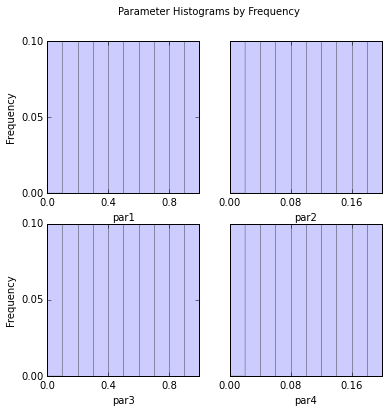



par1:
 Freq:         0.10     0.10     0.10     0.10     0.10     0.10     0.10     0.10     0.10     0.10 
 Bins:        0      0.1      0.2      0.3      0.4      0.5      0.6      0.7      0.8      0.9        1 

par2:
 Freq:         0.10     0.10     0.10     0.10     0.10     0.10     0.10     0.10     0.10     0.10 
 Bins:        0     0.02     0.04     0.06     0.08      0.1     0.12     0.14     0.16     0.18      0.2 

par3:
 Freq:         0.10     0.10     0.10     0.10     0.10     0.10     0.10     0.10     0.10     0.10 
 Bins:        0      0.1      0.2      0.3      0.4      0.5      0.6      0.7      0.8      0.9        1 

par4:
 Freq:         0.10     0.10     0.10     0.10     0.10     0.10     0.10     0.10     0.10     0.10 
 Bins:        0     0.02     0.04     0.06     0.08      0.1     0.12     0.14     0.16     0.18      0.2 



In [8]:
out = s.samples.hist(ncols=2,title='Parameter Histograms by Frequency',frequency=True)

             par1     par2     par3     par4 
par1         1.00     0.00    -0.01    -0.01 
par2         0.00     1.00    -0.00     0.01 
par3        -0.01    -0.00     1.00     0.03 
par4        -0.01     0.01     0.03     1.00 


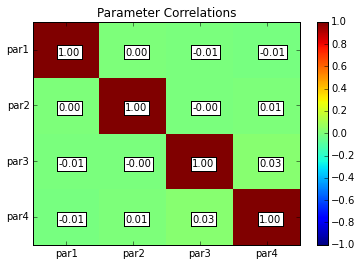

In [9]:
parcor = s.samples.corr(plot=True, title='Parameter Correlations')

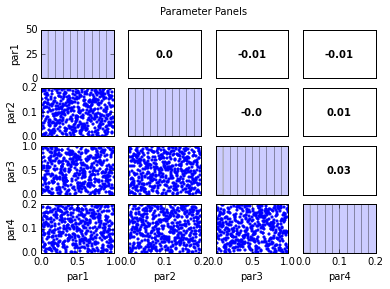

In [10]:
out = s.samples.panels(title='Parameter Panels')

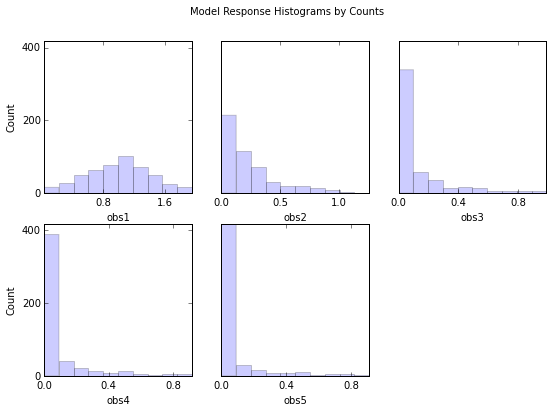



obs1:
Count:           16       28       50       63       78      102       72       50       25       16 
 Bins:    0.033     0.23     0.42     0.61      0.8     0.99      1.2      1.4      1.6      1.8        2 

obs2:
Count:          214      115       71       32       20       21       14        9        3        1 
 Bins:   0.0036     0.13     0.25     0.38     0.51     0.63     0.76     0.88        1      1.1      1.3 

obs3:
Count:          339       59       37       13       16       14        6        6        5        5 
 Bins:  8.5e-05    0.099      0.2      0.3     0.39     0.49     0.59     0.69     0.79     0.89     0.99 

obs4:
Count:          388       40       22       13        7       12        5        3        4        6 
 Bins:  1.8e-06    0.092     0.18     0.27     0.37     0.46     0.55     0.64     0.73     0.82     0.92 

obs5:
Count:          418       29       15        8        7       10        1        5        4        3 
 Bins:  4.2e-08    0.091  

In [12]:
# Run model with parameter samples
s.run( cpus=2, outfile='results.dat', logfile='log.dat',verbose=False)

# Look at response histograms, correlations, and panels
out = s.responses.hist(ncols=3,title='Model Response Histograms by Counts')

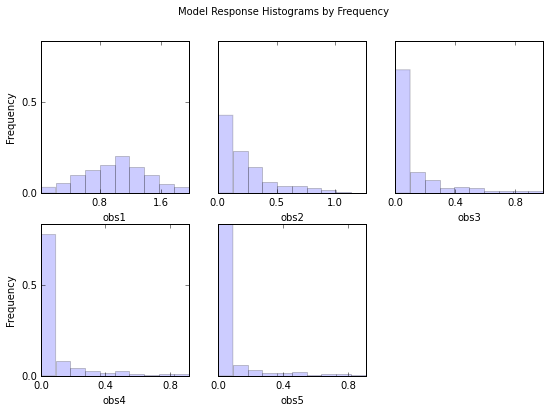



obs1:
 Freq:         0.03     0.06     0.10     0.13     0.16     0.20     0.14     0.10     0.05     0.03 
 Bins:    0.033     0.23     0.42     0.61      0.8     0.99      1.2      1.4      1.6      1.8        2 

obs2:
 Freq:         0.43     0.23     0.14     0.06     0.04     0.04     0.03     0.02     0.01     0.00 
 Bins:   0.0036     0.13     0.25     0.38     0.51     0.63     0.76     0.88        1      1.1      1.3 

obs3:
 Freq:         0.68     0.12     0.07     0.03     0.03     0.03     0.01     0.01     0.01     0.01 
 Bins:  8.5e-05    0.099      0.2      0.3     0.39     0.49     0.59     0.69     0.79     0.89     0.99 

obs4:
 Freq:         0.78     0.08     0.04     0.03     0.01     0.02     0.01     0.01     0.01     0.01 
 Bins:  1.8e-06    0.092     0.18     0.27     0.37     0.46     0.55     0.64     0.73     0.82     0.92 

obs5:
 Freq:         0.84     0.06     0.03     0.02     0.01     0.02     0.00     0.01     0.01     0.01 
 Bins:  4.2e-08    0.091  

In [13]:
out = s.responses.hist(ncols=3,title='Model Response Histograms by Frequency',frequency=True)

             obs1     obs2     obs3     obs4     obs5 
obs1         1.00     0.43     0.29     0.25     0.23 
obs2         0.43     1.00     0.95     0.89     0.83 
obs3         0.29     0.95     1.00     0.98     0.95 
obs4         0.25     0.89     0.98     1.00     0.99 
obs5         0.23     0.83     0.95     0.99     1.00 


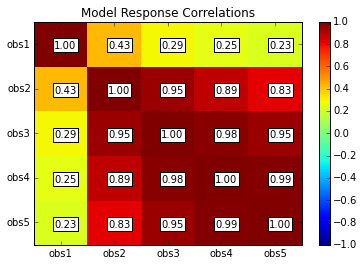

In [14]:
rescor = s.responses.corr(plot=True, title='Model Response Correlations')

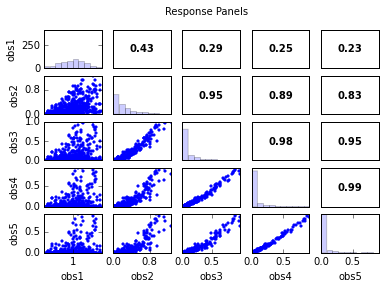

In [15]:
out = s.responses.panels(title='Response Panels')


Pearson Correlation Coefficients:
             obs1     obs2     obs3     obs4     obs5 
par1         0.70     0.30     0.18     0.14     0.12 
par2         0.00    -0.47    -0.40    -0.33    -0.29 
par3         0.70     0.31     0.23     0.22     0.21 
par4         0.01    -0.51    -0.46    -0.41    -0.37 


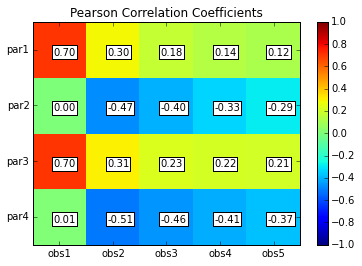

In [16]:
# Print and plot parameter/response correlations
print "\nPearson Correlation Coefficients:"
pcorr = s.corr(plot=True,title='Pearson Correlation Coefficients') 


Spearman Correlation Coefficients:
             obs1     obs2     obs3     obs4     obs5 
par1         0.69     0.34     0.20     0.14     0.10 
par2        -0.01    -0.55    -0.59    -0.60    -0.61 
par3         0.70     0.30     0.17     0.13     0.10 
par4         0.01    -0.54    -0.59    -0.59    -0.60 


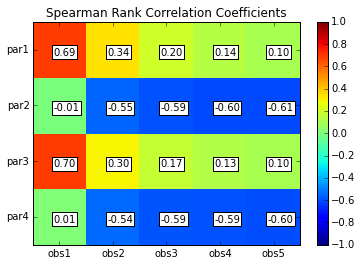

In [17]:
print "\nSpearman Correlation Coefficients:"
scorr = s.corr(plot=True,type='spearman',title='Spearman Rank Correlation Coefficients') 

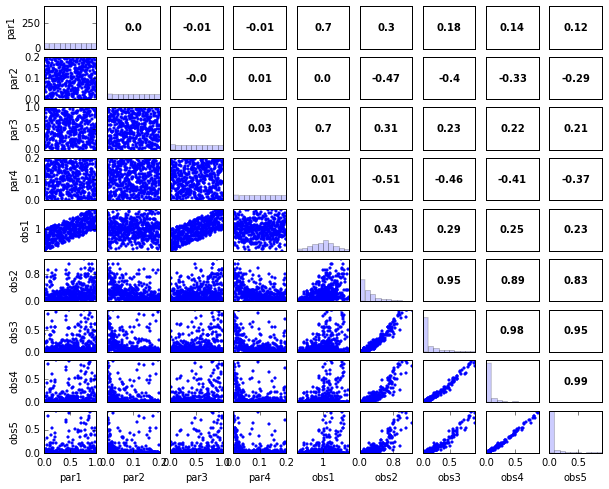

In [19]:
out = s.panels(figsize=(10,8))